<a href="https://colab.research.google.com/github/KimRass/Programming/blob/master/Data%20Science/Machine%20Learning/Time%20Series/NYC%20Taxi%20%26%20TadGAN%20(Anomaly%20Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Science/Machine Learning/Time Series/NYC Taxi & TadGAN (Anomaly Detection).ipynb
!pip uninstall -y keras-nightly tensorflow
!pip install orion-ml "urllib3>=1.25.4, <1.26"

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 110 kB 5.4 MB/s 
     |████████████████████████████████| 127 kB 33.0 MB/s 
     |████████████████████████████████| 5.4 MB 41.6 MB/s 
     |████████████████████████████████| 508 kB 48.9 MB/s 
     |████████████████████████████████| 180 kB 43.8 MB/s 
     |████████████████████████████████| 10.1 MB 27.4 MB/s 
     |████████████████████████████████| 377 kB 40.3 MB/s 
     |████████████████████████████████| 2.5 MB 35.1 MB/s 
     |████████████████████████████████| 17.3 MB 524 kB/s 
     |████████████████████████████████| 2.9 MB 41.9 MB/s 
     |████████████████████████████████| 149 kB 45.9 MB/s 
     |████████████████████████████████| 107 kB 46.7 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 310 kB 43.8 MB/s 
     |███████

- Restart runtime

In [1]:
!pip freeze | grep orion-ml

orion-ml==0.2.0


In [2]:
%%bash
rm -rf Orion
rm -rf images

git clone https://github.com/signals-dev/Orion.git
mv Orion/tutorials/tulog/* .
exit

Cloning into 'Orion'...


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from orion import Orion
from orion.data import load_signal, load_anomalies
from orion.primitives.tadgan import TadGAN, score_anomalies
from orion.primitives.timeseries_anomalies import find_anomalies
from utils import plot, plot_ts, plot_rws, plot_error, unroll_ts
from model import hyperparameters

plt.style.use("dark_background")

Using TensorFlow backend.


In [4]:
signal = "nyc_taxi"
raw_data = load_signal(signal)
known_anoms = load_anomalies(signal)

In [5]:
known_anoms

,start,end
0,1414679400,1415050200
1,1416913200,1417284000
2,1419330600,1419701400
3,1419885000,1420255800
4,1422127800,1422498600


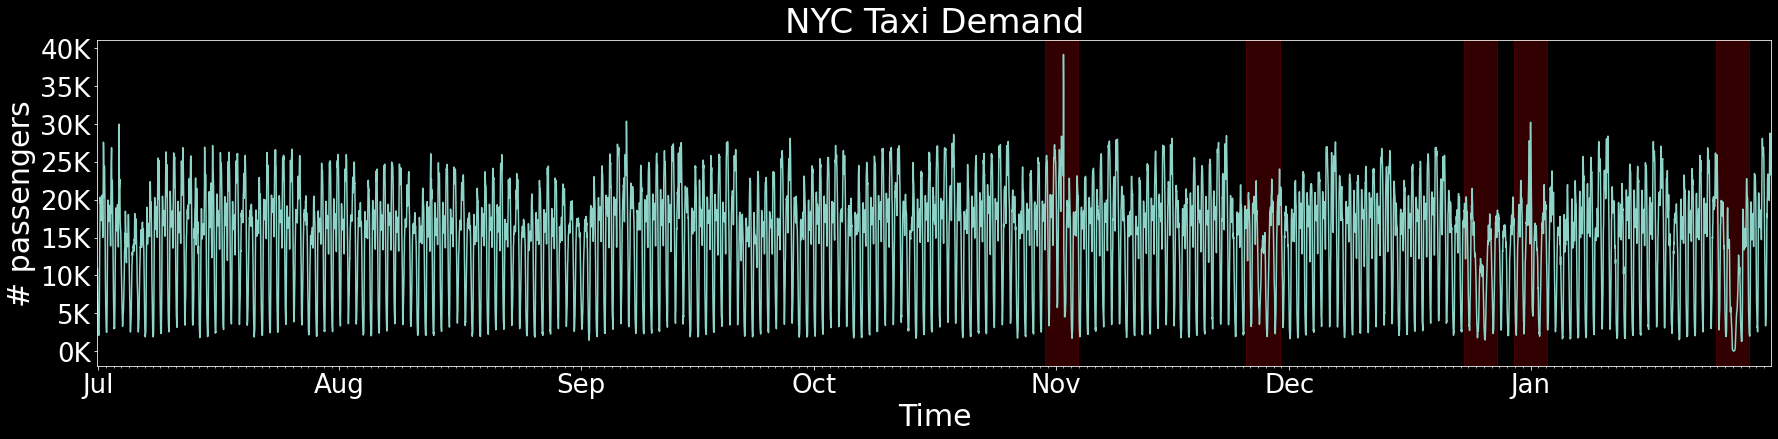

In [6]:
plot(raw_data, anomalies=known_anoms);

# Modeling

## Using Orion Pipelines

In [23]:
orion = Orion(pipeline="tadgan")
detected_anoms = orion.fit_detect(raw_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected

Epoch: 1/35, [Dx loss: [ 6.4582267e+00 -1.6138642e-01 -1.2217958e-03  6.6208351e-01]] [Dz loss: [ 0.66871285 -0.3407508   0.03252918  0.09769345]] [G loss: [ 2.1331348e+00  1.4457373e-03 -2.8409606e-02  2.1600989e-01]]
Epoch: 2/35, [Dx loss: [-0.11439744 -2.0442092   0.1484857   0.17813262]] [Dz loss: [ 0.6585956  -0.47412175  0.27943572  0.08532817]] [G loss: [ 1.6234698  -0.20032987 -0.27966547  0.21034652]]
Epoch: 3/35, [Dx loss: [-2.5502315  -3.8675942   0.43978032  0.08775826]] [Dz loss: [ 1.1746085  -0.56187296  0.9365386   0.07999428]] [G loss: [ 0.74979246 -0.4022102  -0.8460473   0.19980498]]
Epoch: 4/35, [Dx loss: [-3.2944474  -4.47684     0.6563443   0.05260484]] [Dz loss: [ 2.1630704  -0.57286954  2.0855958   0.06503443]] [G loss: [-0.38781023 -0.5461592  -1.8367687   0.19951177]]
Epoch: 5/35, [Dx loss: [-3.467619   -4.55778     0.59208405  0.04980767]] [Dz loss: [ 3.4245434  -0.4668302   3.3571358   0.05342382]] [G loss: [-0.9966849  -0.47417647 -3.0744662   0.2551958 ]]
E

In [8]:
detected_anoms

,start,end,severity
0,1404432000,1404793800,0.446441
1,1409871600,1410148800,0.229459
2,1410395400,1410755400,0.342373
3,1413500400,1413693000,0.228560
4,1414713600,1414990800,0.211533
5,1419298200,1419757200,0.523392
6,1422138600,1422513000,0.434612


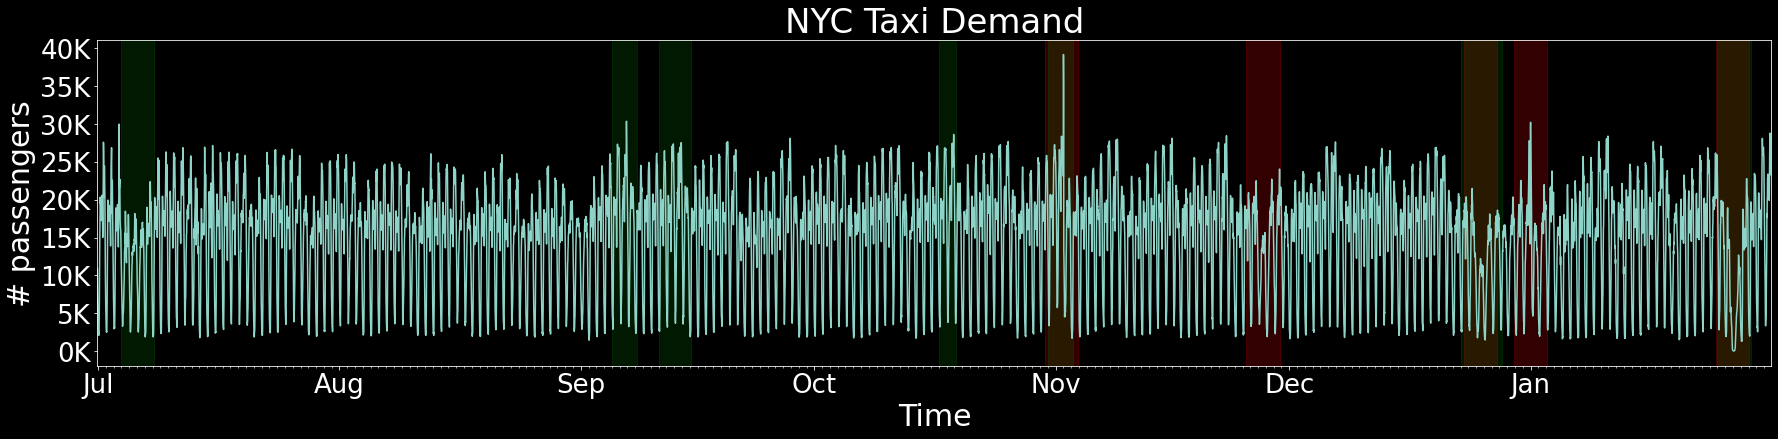

In [9]:
plot(raw_data, anomalies=[known_anoms, detected_anoms])

In [10]:
scores = orion.evaluate(raw_data, known_anoms)

In [11]:
scores

accuracy     0.884798
f1           0.485059
recall       0.543689
precision    0.437842
dtype: float64

## Using `orion.primitives`

In [12]:
# `interval`: An interger that refers to the time span to compute aggregation of.
# `time_column`: Column of `X` that contains time values.
# `method`: What aggregation method should be used to compute the value, by default this set to the mean.
def time_segments_aggregate(X, interval, time_column, method=["mean"]):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    X = X.sort_values(time_column).set_index(time_column)

    if isinstance(method, str):
        method = [method]

    start_ts = X.index.values[0]
    max_ts = X.index.values[-1]
    values = list()
    index = list()
    while start_ts <= max_ts:
        end_ts = start_ts + interval
        subset = X.loc[start_ts:end_ts - 1]
        aggregated = [getattr(subset, agg)(skipna=True).values for agg in method]
        values.append(np.concatenate(aggregated))
        index.append(start_ts)
        start_ts = end_ts
    return np.asarray(values), np.asarray(index)

# 30 minutes == 1800 seconds.
data, index = time_segments_aggregate(raw_data, interval=1800, time_column="timestamp")

In [13]:
# Data Imputation
imp = SimpleImputer()
data = imp.fit_transform(data)

# Feature Scaling
sc = MinMaxScaler(feature_range=(-1, 1))
data = sc.fit_transform(data)

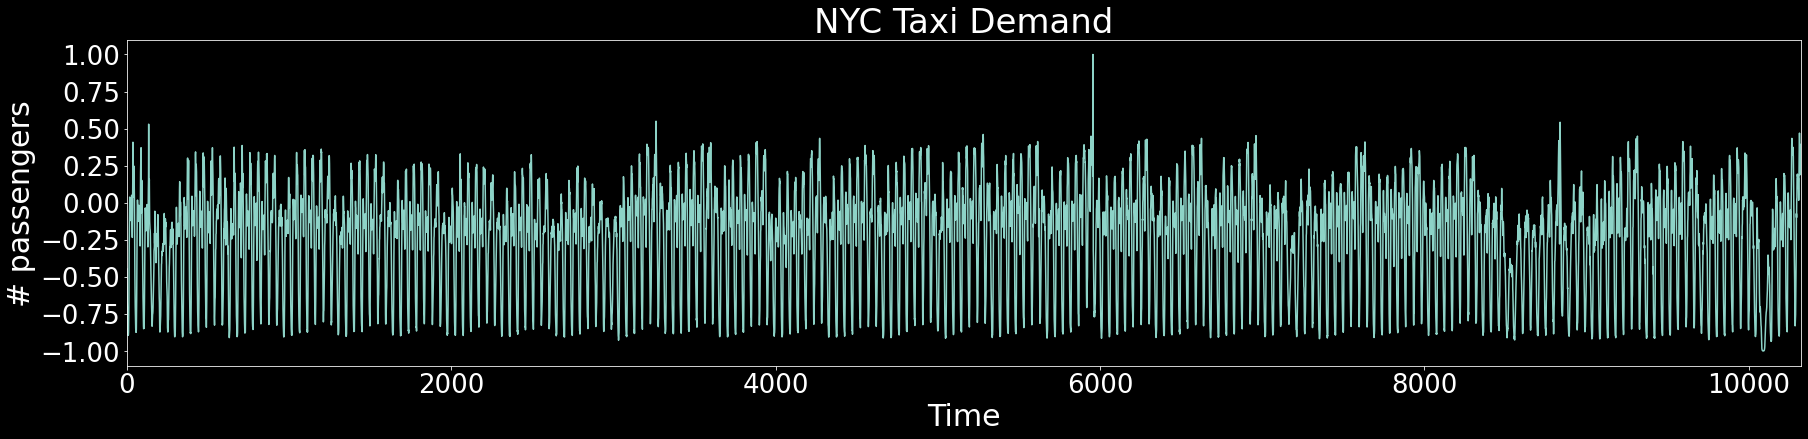

In [14]:
# `label`: Label for the legend.
plot_ts(data)

In [15]:
# Blocked CV
def rolling_window_sequences(X, index, window_size, target_size, step_size, target_column, drop=None, drop_windows=False):
    out_X = list()
    out_y = list()
    X_index = list()
    y_index = list()
    target = X[:, target_column]

    if drop_windows:
        if hasattr(drop, '__len__') and (not isinstance(drop, str)):
            if len(drop) != len(X):
                raise Exception('Arrays `drop` and `X` must be of the same length.')
        else:
            if isinstance(drop, float) and np.isnan(drop):
                drop = np.isnan(X)
            else:
                drop = X == drop

    start = 0
    max_start = len(X) - window_size - target_size + 1
    while start < max_start:
        end = start + window_size

        if drop_windows:
            drop_window = drop[start:end + target_size]
            to_drop = np.where(drop_window)[0]
            if to_drop.size:
                start += to_drop[-1] + 1
                continue

        out_X.append(X[start:end])
        out_y.append(target[end:end + target_size])
        X_index.append(index[start])
        y_index.append(index[end])
        start = start + step_size

    return np.asarray(out_X), np.asarray(out_y), np.asarray(X_index), np.asarray(y_index)

X, y, X_index, y_index = rolling_window_sequences(data, index, window_size=100, target_size=1, step_size=1, target_column=0)

# Modeling
- The architecture of the model requires four neural networks:
    - `encoder`: maps `X` to its latent representation `Z`.
    - `generator`: maps the latent variable `Z` back to `X`, which we will denote later on as `X_hat`.
    - `criticX`: discriminates between `X` and `generator(Z)` or `X_hat`.
    - `criticZ`: discriminates between `Z` and `encoder(X)`.
- 
To use the `TadGAN` model, we specify a number of parameters including the model layers (structure of the previously mentioned neural networks). We also specify the input dimensions, the number of epochs, the learning rate, etc. All the parameters are listed below.

In [16]:
hyperparameters["epochs"] = 10
hyperparameters["shape"] = (X.shape[1], X.shape[2])
hyperparameters["optimizer"] = "keras.optimizers.Adam"
hyperparameters["learning_rate"] = 0.0005
hyperparameters["latent_dim"] = 20
hyperparameters["batch_size"] = 64

# display(hyperparameters)

In [17]:
tgan = TadGAN(**hyperparameters)
tgan.fit(X=X, y=X)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected

Epoch: 1/10, [Dx loss: [-0.7516241 -3.9814847  2.6430008  0.058686 ]] [Dz loss: [-0.8824546  -0.89184874 -1.30508     0.13144743]] [G loss: [ 1.3250797  -2.666778    2.3456967   0.16461611]]
Epoch: 2/10, [Dx loss: [-0.75722617 -6.8878465   5.9785247   0.01520979]] [Dz loss: [-3.10878    -1.6310388  -2.7999375   0.13221961]] [G loss: [-1.2335291  -5.8658257   3.5546825   0.10776137]]
Epoch: 3/10, [Dx loss: [-0.55595225 -6.0994925   5.393663    0.01498765]] [Dz loss: [-1.4758058  -0.98059237 -0.98292935  0.04877165]] [G loss: [-3.163956   -5.396195    1.3951395   0.08370991]]
Epoch: 4/10, [Dx loss: [ -0.3925688 -11.086221   10.570885    0.0122772]] [Dz loss: [-1.2214137   0.08074518 -1.838004    0.05358454]] [G loss: [ -7.417994   -10.512905     2.3819878    0.07129231]]
Epoch: 5/10, [Dx loss: [ -0.5787491 -11.463948   10.7665      0.01187  ]] [Dz loss: [-2.9925518   1.2701015  -5.6613793   0.13987261]] [G loss: [ -1.6050018 -10.617753    7.9374843   0.1075267]]
Epoch: 6/10, [Dx loss: [-

<img src="https://raw.githubusercontent.com/sintel-dev/Orion/e48569fc7796f569615e069d95114bdd2d37623f/tutorials/tulog/images/reconstruct.png" alt="`unroll_ts()`"/>

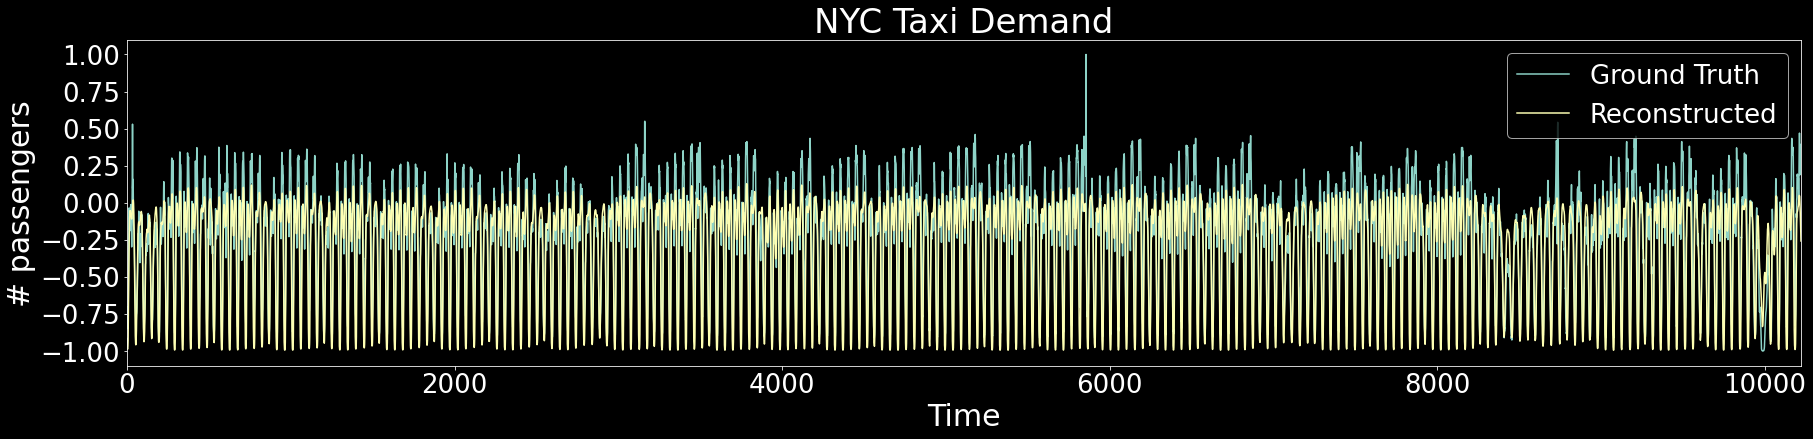

In [18]:
X_hat, critic = tgan.predict(X=X, y=X)
y_hat = unroll_ts(X_hat)

plot_ts([y, y_hat], labels=["Ground Truth", "Reconstructed"])

# Error Computation

## Implementation

In [19]:
error = np.zeros(shape=y.shape)
length = y.shape[0]
for i in range(length):
    error[i] = abs(y_hat[i] - y[i])

fig = plt.figure(figsize=(30, 3))
plt.plot(error);

## Using `orion.primitives.tadgan.score_anomalies()`

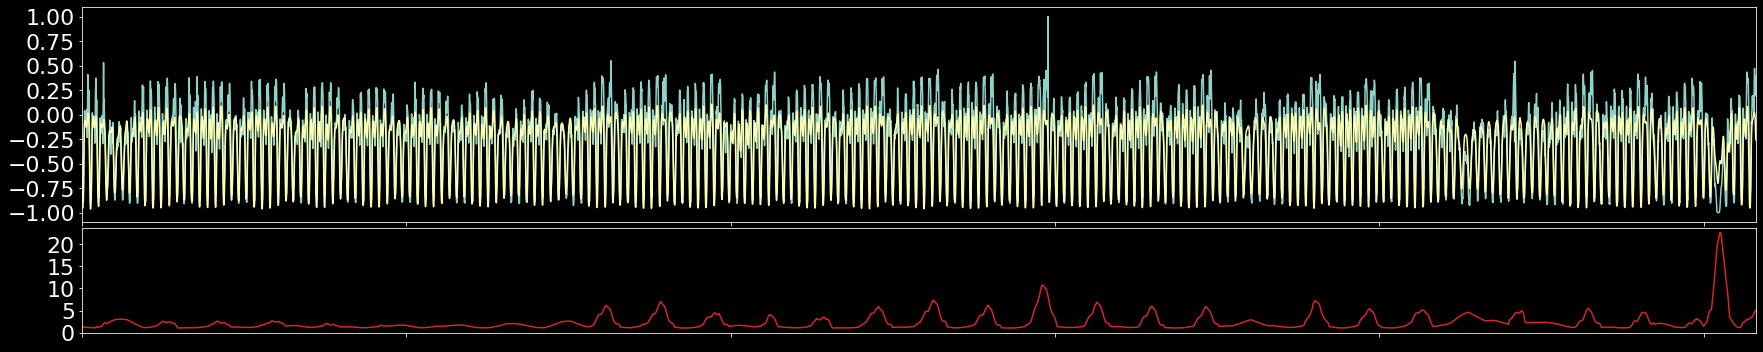

In [20]:
errors, _, y_true, y_pred = score_anomalies(y=X, y_hat=X_hat, critic=critic, index=X_index, rec_error_type="dtw", comb="mult")
y_pred = np.array(y_pred).mean(axis=2)

plot_error([[y_true, y_pred], errors])

# Detect Anomalies

## Implementation

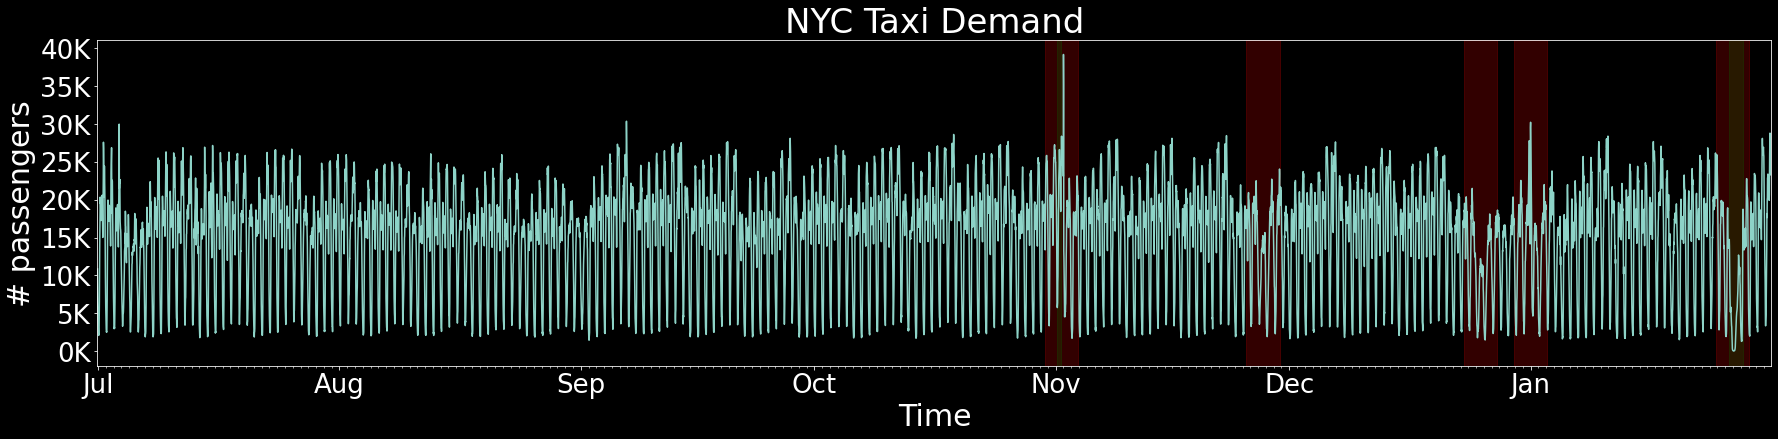

In [21]:
def detect_anoms(errors, index, threshold):
    thr = threshold
    detected_anoms = list()
    i = 0
    max_start = len(errors)
    while i < max_start:
        j = i
        start = index[i]
        while errors[i] > thr:
            i += 1
        end = index[i]
        if start != end:
            detected_anoms.append((start, end, np.mean(errors[j: i+1])))
        i += 1
    return detected_anoms

detected_anoms = detect_anoms(errors=errors, index=index, threshold=10)
detected_anoms = pd.DataFrame(detected_anoms, columns=["start", "end", "score"])

plot(raw_data, anomalies=[known_anoms, detected_anoms])

## Using `orion.primitives.timeseries_anomalies.find_anomalies()` (Window-based Method)

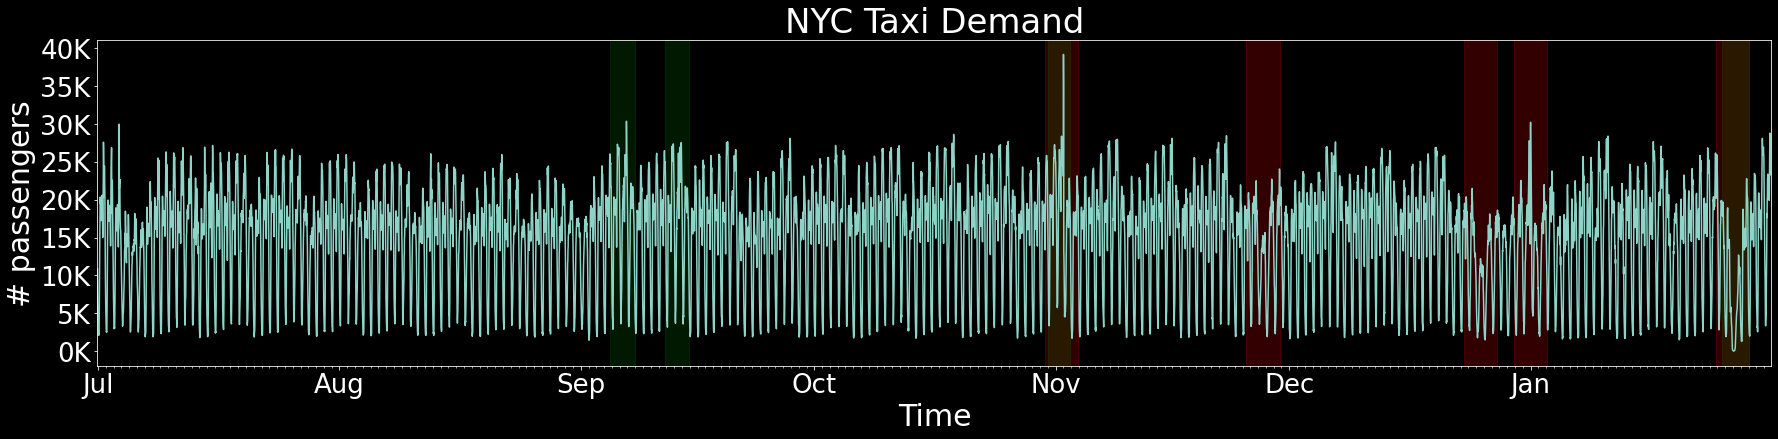

In [22]:
detected_anoms = find_anomalies(errors=errors, index=index, window_size_portion=0.33, window_step_size_portion=0.1, fixed_threshold=True)
detected_anoms = pd.DataFrame(detected_anoms, columns=["start", "end", "score"])

plot(raw_data, anomalies=[known_anoms, detected_anoms])